In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd

import math
import matplotlib.pyplot as plt

import tqdm
tf.enable_eager_execution()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



### Dataset improt and exploration 

In [11]:
# import dataset
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Instructions for updating:
Colocations handled automatically by placer.


W0412 15:17:50.742747 4504430016 deprecation.py:323] From /Users/kkhvatov/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/control_flow_ops.py:423: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [15]:
# provide class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [16]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


#### Data preprocessing

In [19]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels


train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

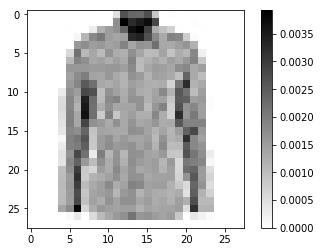

In [21]:
# Check the first image 
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

### Build the model

#### Layers:
    1. Convolutional with 3x3 filter and 32 output filters in the convolution
    2. Max pooling with 2x2 pooling size 
    3. Convolutional with 3x3 filter anf 64 output filters in the convolution
    4. Max pooling with 2x2 pooling size
    5. Flattem layer
    6. Dense (fully connected) layer with 128 neurones
    7. Output (fully connected) layer with 10 (number of classes) neurons

In [23]:
# project the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [24]:
# compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [30]:
train_dataset

<DatasetV1Adapter shapes: ((?, ?, ?, 28, 28, 1), (?, ?, ?)), types: (tf.float32, tf.int64)>

In [ ]:
model.fit(train_dataset, epochs=3, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/3
